In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [64]:
data=pd.read_csv('retail_sales_dataset.csv')
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [65]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data['Gender']=l.fit_transform(data['Gender'])
data['Customer ID']=l.fit_transform(data['Customer ID'])
data['Product Category']=l.fit_transform(data['Product Category'])
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,0,1,34,0,3,50,150
1,2,2023-02-27,1,0,26,1,2,500,1000
2,3,2023-01-13,2,1,50,2,1,30,30
3,4,2023-05-21,3,1,37,1,1,500,500
4,5,2023-05-06,4,1,30,0,2,50,100


In [66]:
data.isna().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [67]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Customer ID,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Gender,1000.0,0.490,0.500150,0.0,0.00,0.0,1.00,1.0
Age,1000.0,41.392,13.681430,18.0,29.00,42.0,53.00,64.0
Product Category,1000.0,1.035,0.805247,0.0,0.00,1.0,2.00,2.0
Quantity,1000.0,2.514,1.132734,1.0,1.00,3.0,4.00,4.0
Price per Unit,1000.0,179.890,189.681356,25.0,30.00,50.0,300.00,500.0
Total Amount,1000.0,456.000,559.997632,25.0,60.00,135.0,900.00,2000.0


In [68]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,0,1,34,0,3,50,150
1,2,2023-02-27,1,0,26,1,2,500,1000
2,3,2023-01-13,2,1,50,2,1,30,30
3,4,2023-05-21,3,1,37,1,1,500,500
4,5,2023-05-06,4,1,30,0,2,50,100


In [69]:
x=data.drop(columns=['Date','Quantity'])
y=data.iloc[:,-3:-2]

In [70]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.25,random_state=3)
print('\n*****Training Data Shape" *******\n')
print("\nTraining data-X- Shape:\t",xtrain.shape)
print("\nTraining data-y- Shape:\t",ytrain. shape)
print('\n***************Testing Data Shape***************\n')
print('\nTesting data (x-Input) Shape:\t',xtest.shape)
print('\nTesting data (y-Outcome) Shape:\t',ytest.shape)



*****Training Data Shape" *******


Training data-X- Shape:	 (750, 7)

Training data-y- Shape:	 (750, 1)

***************Testing Data Shape***************


Testing data (x-Input) Shape:	 (250, 7)

Testing data (y-Outcome) Shape:	 (250, 1)


<Axes: ylabel='count'>

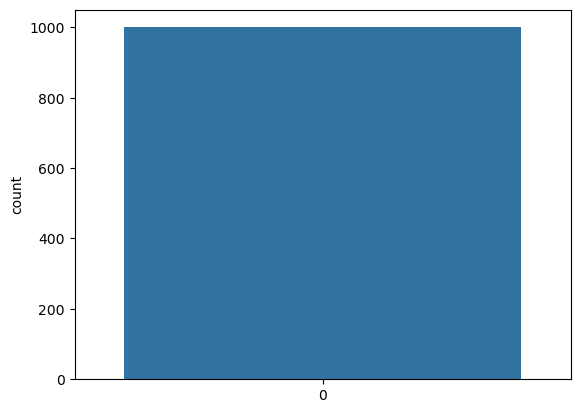

In [78]:
sns.countplot(data['Quantity'])

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(xtrain,ytrain)
print('\nHyperparameter:\n\n',dt_clf.get_params())
ypred=dt_clf.predict(xtest)
print("\nPredicted class lables for the test samples:\n\n",ypred)


Hyperparameter:

 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Predicted class lables for the test samples:

 [3 2 3 3 4 1 3 4 3 2 3 3 2 1 4 2 1 4 3 1 2 2 3 3 4 4 1 1 1 1 2 1 4 1 4 2 2
 1 3 2 1 3 3 2 3 1 3 3 2 1 4 3 2 4 1 2 2 3 2 3 1 2 1 2 3 4 3 3 4 4 1 2 4 4
 3 2 2 1 3 1 2 3 1 2 4 2 1 3 3 2 3 3 4 3 2 4 4 2 2 4 1 4 1 1 4 1 4 4 4 2 3
 3 3 1 1 1 3 2 3 2 1 2 2 4 1 2 1 4 3 2 1 2 3 3 4 4 1 2 4 3 1 2 4 1 2 2 1 4
 2 2 4 2 1 2 3 4 3 4 2 2 3 3 1 4 3 3 2 2 4 1 3 2 1 4 4 4 1 4 1 3 4 1 3 1 4
 4 1 2 3 3 1 3 3 2 2 4 1 3 3 1 1 3 4 4 3 1 2 3 3 1 1 3 2 3 4 4 3 1 2 4 2 4
 4 2 1 4 4 1 3 1 4 4 2 3 4 3 4 4 2 3 2 3 1 2 4 1 3 4 4 3]


C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

In [73]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print('\n*****Performance measure for logistic regression classification" *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ytest,ypred))

print("\n****************************** "*2)
      
print("\nPrecision score:\t",precision_score(ytest,ypred,average='macro'))
print("\n****************************** "*2)
      
print("\nConfusion Matrix:\t",confusion_matrix(ytest,ypred))
print("\n****************************** "*2)

print('\nF1 score: \t',f1_score(ytest,ypred,average='macro'))

print("\n****************************** "*2)

print('\nRecall score: \t',recall_score(ytest,ypred,average='macro'))

print("\n****************************** "*2)



*****Performance measure for logistic regression classification" *******


****************************** 
****************************** 

Accuracy Score :	 1.0

****************************** 
****************************** 

Precision score:	 1.0

****************************** 
****************************** 

Confusion Matrix:	 [[59  0  0  0]
 [ 0 61  0  0]
 [ 0  0 68  0]
 [ 0  0  0 62]]

****************************** 
****************************** 

F1 score: 	 1.0

****************************** 
****************************** 

Recall score: 	 1.0

****************************** 
****************************** 


In [74]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
dt_reg.fit(xtrain,ytrain)
sales_pred=dt_reg.predict(xtest)
print('\n*****Performance measures for Decision Tree Regression:*****\n')
print("\nMean Squared Error (MSE):\t",mean_squared_error(ytest,sales_pred))
print("\nR-squared (R^2) Score:\t", r2_score(ytest,sales_pred))


*****Performance measures for Decision Tree Regression:*****


Mean Squared Error (MSE):	 0.0

R-squared (R^2) Score:	 1.0


C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

In [75]:
pruned_dt_reg = DecisionTreeRegressor(max_depth=5)
pruned_dt_reg.fit(xtrain, ytrain)
pruned_sales_pred = pruned_dt_reg.predict(xtest)
pruned_r2 = r2_score(ytest, pruned_sales_pred)
print("\nR-squared (Pruned) Score:\t", pruned_r2)



R-squared (Pruned) Score:	 0.9290684891408855


C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

[Text(0.3333333333333333, 0.9444444444444444, 'Total Amount <= 55.0\ngini = 0.749\nsamples = 750\nvalue = [194, 182, 173, 201]'),
 Text(0.18181818181818182, 0.8333333333333334, 'Price per Unit <= 27.5\ngini = 0.393\nsamples = 164\nvalue = [120, 44, 0, 0]'),
 Text(0.12121212121212122, 0.7222222222222222, 'Total Amount <= 37.5\ngini = 0.5\nsamples = 86\nvalue = [42, 44, 0, 0]'),
 Text(0.06060606060606061, 0.6111111111111112, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0, 0]'),
 Text(0.18181818181818182, 0.6111111111111112, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0, 0]'),
 Text(0.24242424242424243, 0.7222222222222222, 'gini = 0.0\nsamples = 78\nvalue = [78, 0, 0, 0]'),
 Text(0.48484848484848486, 0.8333333333333334, 'Total Amount <= 95.0\ngini = 0.724\nsamples = 586\nvalue = [74, 138, 173, 201]'),
 Text(0.36363636363636365, 0.7222222222222222, 'Total Amount <= 67.5\ngini = 0.466\nsamples = 100\nvalue = [0, 37, 63, 0]'),
 Text(0.30303030303030304, 0.6111111111111112, 'gini = 0.0\nsamples 

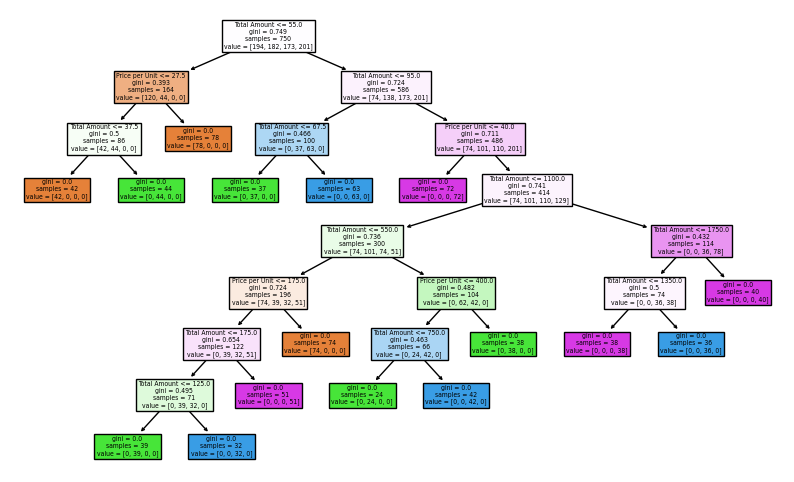

In [76]:
from sklearn import tree
plt.figure(figsize=(10,6))
tree.plot_tree(dt_clf,feature_names=x.columns,filled=True)